# Analyzing zebrafish behavior

## You are welcome to use this notebook.

### If you have any questions, reach out! 

#### Created on June 2023 as part of the SPINES course at the MBL by Daniela del Río, modified by... YOU!

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import time
import pandas as pd

# Based on Erin's nice plots
# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

In [2]:
def std_sum(x, y):
    return np.sqrt(x**2 + y**2)

    smldist-scale defined: Total distance covered by the animal in small movement.
    smldur-seconds: Total duration spent by the animal in small movement.
    larct-count: Large movement count.
    lardist- scale defined: Total distance covered by the animal in large movements.
    lardur-seconds: Total duration (in s) spent by the animal in large movements.

In [3]:
# Based on: https://realpython.com/python3-object-oriented-programming/
class Fish:
    '''
        acronym-unit: Definition
        entct-count: Each time the animal enters an area
        inact-count: Inactivity count (1 count= when the fish is entering this speed class)
        inadist-scale defined: Total distance covered by the animal in inactivity
        inadur-seconds: Total duration spent in inactivity.
        smlct-count: Small movement count.
        smldist-scale defined: Total distance covered by the animal in small movement.
        smldur-seconds: Total duration spent by the animal in small movement.
        larct-count: Large movement count.
        lardist- scale defined: Total distance covered by the animal in large movements.
        lardur-seconds: Total duration (in s) spent by the animal in large movements.
        emptydur-seconds: Time during which no object/animal is detected in the location.
        emptyct-count: Number of times during which no object/animal is detected in the location.
    '''
    def __init__(self, number_fish, concentration, compressed_data):

        self.number_fish = number_fish
        self.concentration = concentration
        self.entct = compressed_data[0]
        self.emptyct = compressed_data[1]
        self.emptydur = compressed_data[2]
        self.inact = compressed_data[3]
        self.inadur = compressed_data[4]
        self.inadist = compressed_data[5]
        self.smlct = compressed_data[6]
        self.smldur = compressed_data[7]
        self.smldist = compressed_data[8]
        self.larct = compressed_data[9]
        self.lardur = compressed_data[10]
        self.lardist = compressed_data[11]
        self.seconds = compressed_data[12]
        self.distance_mean = 0
        self.distance_std = 0
        self.duration_mean = 0
        self.duration_std = 0
       
    
class MeanFish:
    def __init__(self, fish1,fish2,fish3):
# (concentration, entct, emptyct, emptydur, inact, inadur, inadist, smlct, smldur, smldist, larct, lardur, lardist)
        
        self.entct_mean = np.mean([fish1.entct, fish2.entct, fish3.entct],0)
        self.entct_std = np.std([fish1.entct, fish2.entct, fish3.entct],0)
        
        self.emptyct_mean = np.mean([fish1.emptyct, fish2.emptyct, fish3.emptyct],0)
        self.emptyct_std = np.std([fish1.emptyct, fish2.emptyct, fish3.emptyct],0)
        
        self.emptydur_mean = np.mean([fish1.emptydur, fish2.emptydur, fish3.emptydur],0)
        self.emptydur_std = np.std([fish1.emptydur, fish2.emptydur, fish3.emptydur],0)

        self.inact_mean = np.mean([fish1.inact, fish2.inact, fish3.inact],0)
        self.inact_std = np.std([fish1.inact, fish2.inact, fish3.inact],0)

        self.inadur_mean = np.mean([fish1.inadur, fish2.inadur, fish3.inadur],0)
        self.inadur_std = np.std([fish1.inadur, fish2.inadur, fish3.inadur],0)

        self.inadist_mean = np.mean([fish1.inadist, fish2.inadist, fish3.inadist],0)
        self.inadist_std = np.std([fish1.inadist, fish2.inadist, fish3.inadist],0)

        self.smlct_mean = np.mean([fish1.smlct, fish2.smlct, fish3.smlct],0)
        self.smlct_std = np.std([fish1.smlct, fish2.smlct, fish3.smlct],0)

        self.smldur_mean = np.mean([fish1.smldur, fish2.smldur, fish3.smldur],0)
        self.smldur_std = np.std([fish1.smldur, fish2.smldur, fish3.smldur],0)

        self.smldist_mean = np.mean([fish1.smldist, fish2.smldist, fish3.smldist],0)
        self.smldist_std = np.std([fish1.smldist, fish2.smldist, fish3.smldist],0)

        self.larct_mean = np.mean([fish1.larct, fish2.larct, fish3.larct],0)
        self.larct_std = np.std([fish1.larct, fish2.larct, fish3.larct],0)

        self.lardur_mean = np.mean([fish1.lardur, fish2.lardur, fish3.lardur],0)
        self.lardur_std = np.std([fish1.lardur, fish2.lardur, fish3.lardur],0)

        self.lardist_mean = np.mean([fish1.lardist, fish2.lardist, fish3.lardist],0)
        self.lardist_std = np.std([fish1.lardist, fish2.lardist, fish3.lardist],0)
        
        self.distance_mean = np.mean([fish1.lardist+fish1.smldist, fish2.lardist+fish2.smldist, fish3.lardist+fish3.smldist],0)
        self.distance_std = std_sum(self.smldist_std, self.larct_std)
        # Standard deviation of a sum of 2 random variables, see:
        # https://study.com/skill/learn/how-to-calculate-the-standard-deviation-of-the-sum-of-two-random-variables-explanation.html
        
        self.duration_mean = np.mean([fish1.lardur+fish1.smldur, fish2.lardur+fish2.smldur, fish3.lardur+fish3.smldur],0)
        self.duration_std = std_sum(self.smldur_std, self.lardur_std)
        
        
# Because one of our fish died
class MeanFish_2:
    def __init__(self, fish2,fish3):
# (concentration, entct, emptyct, emptydur, inact, inadur, inadist, smlct, smldur, smldist, larct, lardur, lardist)
        
        self.entct_mean = np.mean([fish2.entct, fish3.entct],0)
        self.entct_std = np.std([fish2.entct, fish3.entct],0)
        
        self.emptyct_mean = np.mean([fish2.emptyct, fish3.emptyct],0)
        self.emptyct_std = np.std([fish2.emptyct, fish3.emptyct],0)
        
        self.emptydur_mean = np.mean([fish2.emptydur, fish3.emptydur],0)
        self.emptydur_std = np.std([fish2.emptydur, fish3.emptydur],0)

        self.inact_mean = np.mean([fish2.inact, fish3.inact],0)
        self.inact_std = np.std([fish2.inact, fish3.inact],0)

        self.inadur_mean = np.mean([fish2.inadur, fish3.inadur],0)
        self.inadur_std = np.std([fish2.inadur, fish3.inadur],0)

        self.inadist_mean = np.mean([fish2.inadist, fish3.inadist],0)
        self.inadist_std = np.std([fish2.inadist, fish3.inadist],0)

        self.smlct_mean = np.mean([fish2.smlct, fish3.smlct],0)
        self.smlct_std = np.std([fish2.smlct, fish3.smlct],0)

        self.smldur_mean = np.mean([fish2.smldur, fish3.smldur],0)
        self.smldur_std = np.std([fish2.smldur, fish3.smldur],0)

        self.smldist_mean = np.mean([fish2.smldist, fish3.smldist],0)
        self.smldist_std = np.std([fish2.smldist, fish3.smldist],0)

        self.larct_mean = np.mean([fish2.larct, fish3.larct],0)
        self.larct_std = np.std([fish2.larct, fish3.larct],0)

        self.lardur_mean = np.mean([fish2.lardur, fish3.lardur],0)
        self.lardur_std = np.std([fish2.lardur, fish3.lardur],0)

        self.lardist_mean = np.mean([fish2.lardist, fish3.lardist],0)
        self.lardist_std = np.std([fish2.lardist, fish3.lardist],0)
        
        self.distance_mean = np.mean([fish2.lardist+fish2.smldist, fish3.lardist+fish3.smldist],0)
        self.distance_std = std_sum(self.smldist_std, self.larct_std)
        # Standard deviation of a sum of 2 random variables, see:
        # https://study.com/skill/learn/how-to-calculate-the-standard-deviation-of-the-sum-of-two-random-variables-explanation.html
        
        self.duration_mean = np.mean([fish2.lardur+fish2.smldur, fish3.lardur+fish3.smldur],0)
        self.duration_std = std_sum(self.smldur_std, self.lardur_std)

# Save your .xls file as a .csv
# In the following cell, change the filename to your datafile.

In [4]:
def extract_fish_data(period=120): #number of seconds by default, 2 min
    '''
        Function that obtains the period data for all fish in 1 iteration of the data sheet.
    '''
#     filename = "Behavioral_box/data.csv"
#     filename = "1hr_drug_water.csv" #timestamps are OK.
#     filename = "2hr_fish_water.csv" # timestamps OK, wtf with concentration 5??

#     filename = "2hr_drug_water_2nd.csv" # timestamps are OK
    filename = "3hr_fish_water_2nd.csv" # Alles gut.
    

    # See: https://docs.python.org/3/library/csv.html
    matrix_fish1 = []
    matrix_fish2 = []
    matrix_fish3 = []
    matrix_fish4 = []
    matrix_fish5 = []
    matrix_fish6 = []
    matrix_fish7 = []
    matrix_fish8 = []
    matrix_fish9 = []
    matrix_fish10 = []
    matrix_fish11 = []
    matrix_fish12 = []

    with open(filename, newline='') as csvfile:

        data = csv.reader(csvfile, delimiter=',', quotechar='|')
        i = 0
        titles = []

        for row in data:

            if i== 0:
                titles = row

            else:
                if round(float(row[9]))-round(float(row[8])) == period:
                    # For saving the time
                    # Based on: https://stackoverflow.com/questions/10663720/how-to-convert-a-time-string-to-seconds
                    x = time.strptime(row[13],'%H:%M:%S')
                    second = round(datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
                    info = row[18:30]+[second]
                    
                    if row[4] == 'A01_Name': # aname corresponds to the 1st fish
                        matrix_fish1.append(info) #Data we are interested in about movement
                    elif row[4] == 'A02_Name':
                        matrix_fish2.append(info)
                    elif row[4] == 'A03_Name':
                        matrix_fish3.append(info)
                        
                    elif row[4] == 'B01_Name':
                        matrix_fish4.append(info)
                    elif row[4] == 'B02_Name':
                        matrix_fish5.append(info)
                    elif row[4] == 'B03_Name':
                        matrix_fish6.append(info)
                        
                    elif row[4] == 'C01_Name':
                        matrix_fish7.append(info)
                    elif row[4] == 'C02_Name':
                        matrix_fish8.append(info)
                    elif row[4] == 'C03_Name':
                        matrix_fish9.append(info)
                    
                    elif row[4] == 'D01_Name':
                        matrix_fish10.append(info)  
                    elif row[4] == 'D02_Name':
                        matrix_fish11.append(info)
                    elif row[4] == 'D03_Name':
                        matrix_fish12.append(info)

            i+=1
            
        fish1 = Fish(1, 0, np.transpose(matrix_fish1).astype(float))
        fish2 = Fish(2, 0, np.transpose(matrix_fish2).astype(float))
        fish3 = Fish(3, 0, np.transpose(matrix_fish3).astype(float))

        fish4 = Fish(4, 5, np.transpose(matrix_fish4).astype(float))
        fish5 = Fish(5, 5, np.transpose(matrix_fish5).astype(float))
        fish6 = Fish(6, 5, np.transpose(matrix_fish6).astype(float))

        fish7 = Fish(7, 20, np.transpose(matrix_fish7).astype(float))
        fish8 = Fish(8, 20, np.transpose(matrix_fish8).astype(float))
        fish9 = Fish(9, 20, np.transpose(matrix_fish9).astype(float))
        
        fish10 = Fish(10, 100, np.transpose(matrix_fish10).astype(float))
        fish11 = Fish(11, 100, np.transpose(matrix_fish11).astype(float))
        fish12 = Fish(12, 100, np.transpose(matrix_fish12).astype(float))
        
    return [fish1,fish2,fish3,fish4,fish5,fish6,fish7,fish8,fish9,fish10,fish11,fish12]

In [5]:
# Extracting the fish data
# seconds = 10
seconds = 120
# seconds = 600

fish1,fish2,fish3,fish4,fish5,fish6,fish7,fish8,fish9,fish10,fish11,fish12 = extract_fish_data(seconds)

In [6]:
# There should be data every 120 seconds, for every fish, for every recording.
fish = fish1
seconds = [fish.seconds[i+1] - fish.seconds[i] for i in range(len(fish.seconds) - 1)]
print(max(seconds))
print(min(seconds))

120.0
120.0


In [7]:
# data
# vehicle = MeanFish_2(fish2, fish3) # One of our fish died...
vehicle = MeanFish(fish1, fish2, fish3)
c5 = MeanFish(fish4, fish5, fish6)
c20 = MeanFish(fish7, fish8, fish9)
c100 = MeanFish(fish10, fish11, fish12)

x = [(i+1)/.6 for i in range(len(vehicle.entct_mean))]

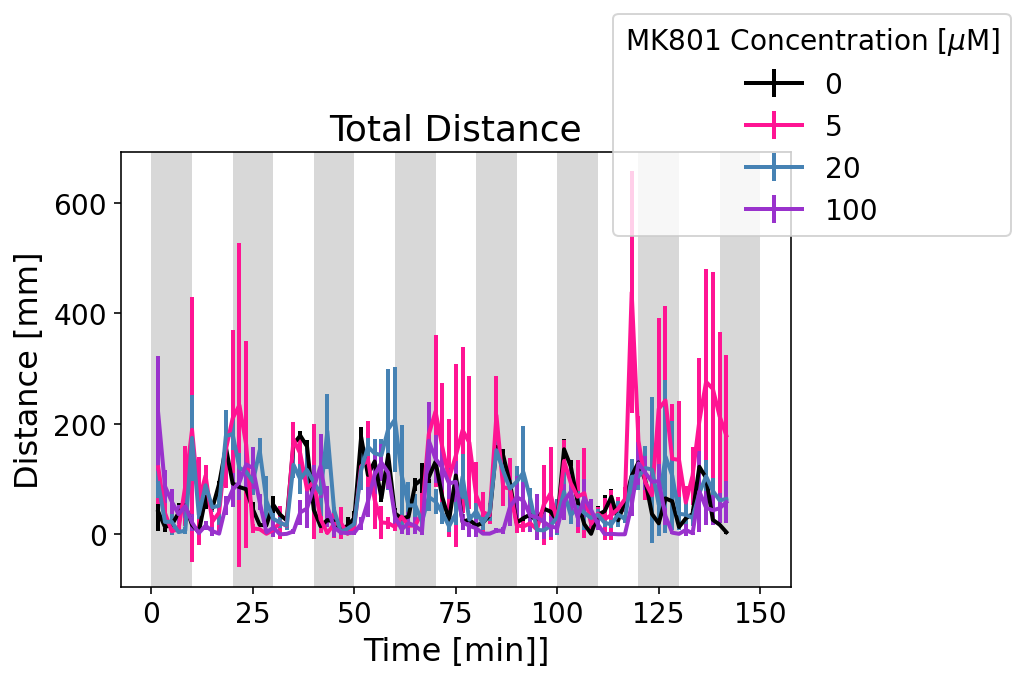

In [8]:
var = 'Total Distance'
num = len(vehicle.distance_mean)
x = [(i+1)/.6 for i in range(num)]
iterations = round(num/10)

plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
# For colors, see: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.errorbar(x, vehicle.distance_mean, yerr=vehicle.distance_std, color='k',label='0',linewidth=2, ms=20, mew=4)
plt.errorbar(x, c5.distance_mean, yerr=c5.distance_std, color='deeppink',label='5',linewidth=2, ms=20, mew=4)
plt.errorbar(x, c20.distance_mean, yerr=c20.distance_std, color='steelblue',label='20',linewidth=2, ms=20, mew=4)
plt.errorbar(x, c100.distance_mean, yerr=c100.distance_std, color = 'darkorchid', label='100',linewidth=2, ms=20, mew=4)

# Dark periods
for i in range(iterations): # -1
    plt.axvspan(i*20, i*20+10, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time [min]]")
plt.ylabel("Distance [mm]")
plt.legend(title=r"MK801 Concentration [$\mu$M]", loc='upper right', bbox_to_anchor=(1.35, 1.35))
plt.show()

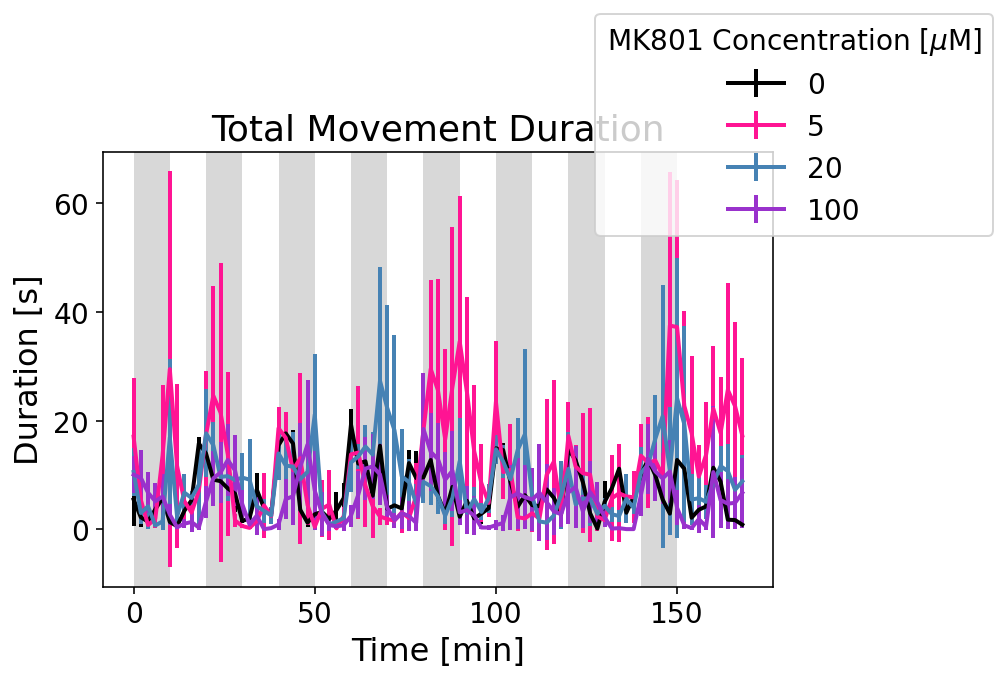

In [9]:
var = 'Total Movement Duration'

num = len(vehicle.distance_mean)
x = [(i+1)/.6 for i in range(num)]
iterations = round(num/10)

time = [round((fish1.seconds[i] - fish1.seconds[0])/60) for i in range(len(fish1.seconds))]
x = time
iterations = round(time[-1]/20)

plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
plt.errorbar(time, vehicle.duration_mean, yerr=vehicle.duration_std, color='k',label='0',linewidth=2, ms=20, mew=4)
plt.errorbar(time, c5.duration_mean, yerr=c5.duration_std, color='deeppink',label='5',linewidth=2, ms=20, mew=4)
plt.errorbar(time, c20.duration_mean, yerr=c20.duration_std, color='steelblue',label='20',linewidth=2, ms=20, mew=4)
plt.errorbar(time, c100.duration_mean, yerr=c100.duration_std, color = 'darkorchid', label='100',linewidth=2, ms=20, mew=4)

# Dark periods
for i in range(iterations):
    plt.axvspan(i*20, i*20+10, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time [min]")
plt.ylabel("Duration [s]")
plt.legend(title=r"MK801 Concentration [$\mu$M]", loc='upper right', bbox_to_anchor=(1.35, 1.35))
plt.show()


# Now, for the dark or light periods

The following is hard coded, make it variable depending on the lenght of the array of seconds.

Sum all the movement of each of the fish in these time windows.

In [10]:
# dark = np.zeros(len(seconds))
# dark[0:10],dark[20:30],dark[40:50],dark[60:70],dark[80:len(seconds)] = 1,1,1,1,1

seconds = [round((fish.seconds[i+1] - fish.seconds[0])/120) for i in range(len(fish.seconds) - 1)]

In [11]:
# List comprehension with multiple conditionals: https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension
dark = [1 if i<=10 or 20<=i<30 or 40<=i<50 or 60<=i<70 or 80<=i<90 or 100<=i<110 else 0 for i in range(len(seconds))]

In [12]:
 # You could make a function out of this

vehicle_dark_vals  = []
c5_dark_vals  = []
c20_dark_vals  = []
c100_dark_vals  = []

vehicle_light_vals  = []
c5_light_vals  = []
c20_light_vals  = []
c100_light_vals  = []

for i in range(len(dark)):
    if dark[i]:
        vehicle_dark_vals.append([fish1.lardist[i], fish1.smldist[i], fish2.lardist[i], fish2.smldist[i], fish3.lardist[i], fish3.smldist[i]])
        c5_dark_vals.append([fish4.lardist[i], fish4.smldist[i], fish5.lardist[i], fish5.smldist[i], fish6.lardist[i], fish6.smldist[i]])
        c20_dark_vals.append([fish7.lardist[i], fish7.smldist[i], fish8.lardist[i], fish8.smldist[i], fish9.lardist[i], fish9.smldist[i]])
        c100_dark_vals.append([fish10.lardist[i], fish10.smldist[i], fish11.lardist[i], fish11.smldist[i], fish12.lardist[i], fish12.smldist[i]])
        
    else: # light
        vehicle_light_vals.append([fish1.lardist[i], fish1.smldist[i], fish2.lardist[i], fish2.smldist[i], fish3.lardist[i], fish3.smldist[i]])
        c5_light_vals.append([fish4.lardist[i], fish4.smldist[i], fish5.lardist[i], fish5.smldist[i], fish6.lardist[i], fish6.smldist[i]])
        c20_light_vals.append([fish7.lardist[i], fish7.smldist[i], fish8.lardist[i], fish8.smldist[i], fish9.lardist[i], fish9.smldist[i]])
        c100_light_vals.append([fish10.lardist[i], fish10.smldist[i], fish11.lardist[i], fish11.smldist[i], fish12.lardist[i], fish12.smldist[i]])

#Obtaining the average movement of the 3 fish, divide by 3
# vehicle_dark, c5_dark, c20_dark, c100_dark = vehicle_dark/3, c5_dark/3, c20_dark/3, c100_dark/3
# vehicle_light, c5_light, c20_light, c100_light = vehicle_light/3, c5_light/3, c20_light/3, c100_light/3
# print(c100_dark)

vehicle_dark_std = np.std(vehicle_dark_vals)
c5_dark_std = np.std(c5_dark_vals)
c20_dark_std = np.std(c20_dark_vals)
c100_dark_std = np.std(c100_dark_vals)

vehicle_dark  = np.sum(vehicle_dark_vals)
c5_dark  = np.sum(c5_dark_vals)
c20_dark  = np.sum(c20_dark_vals)
c100_dark  = np.sum(c100_dark_vals)


vehicle_light_std = np.std(vehicle_light_vals)
c5_light_std = np.std(c5_light_vals)
c20_light_std = np.std(c20_light_vals)
c100_light_std = np.std(c100_light_vals)

vehicle_light  = np.sum(vehicle_light_vals)
c5_light  = np.sum(c5_light_vals)
c20_light  = np.sum(c20_light_vals)
c100_light  = np.sum(c100_light_vals)

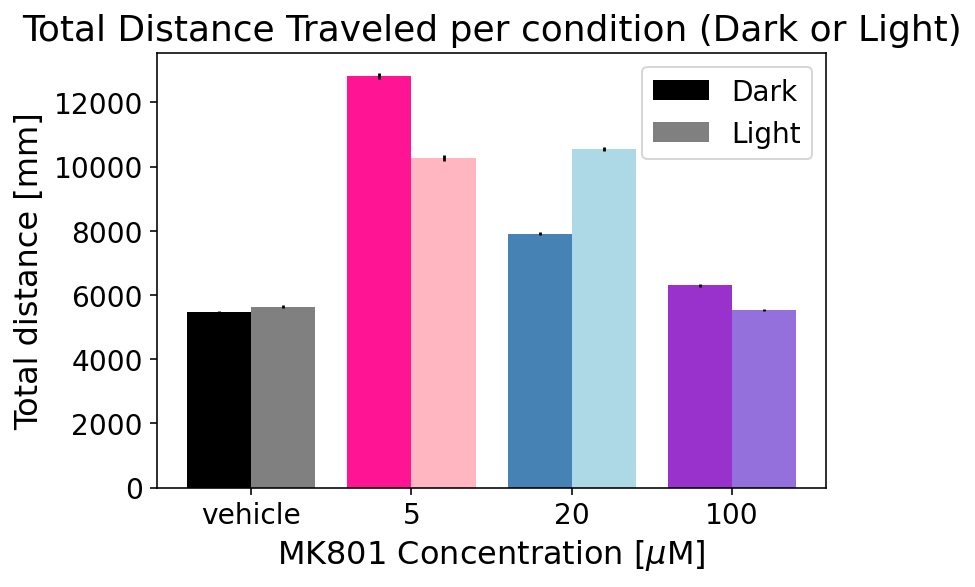

In [13]:
# Based on: https://stackoverflow.com/questions/11597785/setting-spacing-between-grouped-bar-plots
# For barplots, see: https://www.w3schools.com/python/matplotlib_bars.asp
# Errorbars, see https://pythonforundergradengineers.com/python-matplotlib-error-bars.html
groups = [[vehicle_dark, c5_dark, c20_dark, c100_dark],
          [vehicle_light, c5_light, c20_light, c100_light]]
group_labels = ["vehicle", "5", "20", "100"]

num_items = len(group_labels)
ind = np.arange(num_items)

margin = 0.05
width = .4#(1.-2.*margin)/num_items

s = plt.subplot(1,1,1)
colors = [['k', 'deeppink', 'steelblue', 'darkorchid'], ['grey', 'lightpink', 'lightblue', 'mediumpurple']]
error_vals = [[vehicle_dark_std, c5_dark_std, c20_dark_std, c100_dark_std], [vehicle_light_std, c5_light_std, c20_light_std, c100_light_std]]
labels = ["Dark", "Light"]

for num, vals in enumerate(groups):
    xdata = ind + margin + (num*width)
    gene_rects = plt.bar(xdata, vals, width, color=colors[num], yerr=error_vals[num], label=labels[num])
    
s.set_xticks(ind+0.25)
s.set_xticklabels(group_labels)
plt.title("Total Distance Traveled per condition (Dark or Light)")
# plt.title("Average Distance Traveled per fish in Dark or Light")
plt.xlabel("MK801 Concentration [$\mu$M]")
plt.ylabel("Total distance [mm]")
# plt.ylabel("Average distance [mm]")
plt.legend()
plt.show()

# Mean variable plots

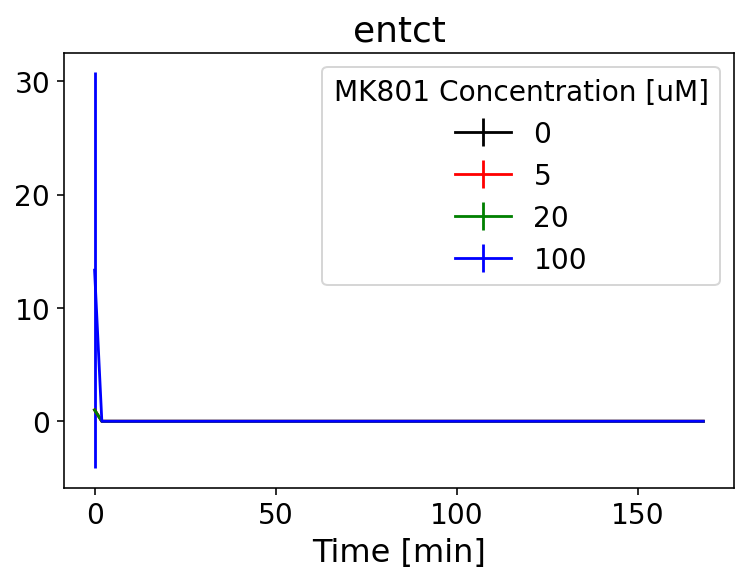

In [14]:
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
var = 'entct'
plt.title(var)
plt.errorbar(x, vehicle.entct_mean, yerr=vehicle.entct_std, color='k',label='0')
plt.errorbar(x, c5.entct_mean, yerr=c5.entct_std, color='r',label='5')
plt.errorbar(x, c20.entct_mean, yerr=c20.entct_std, color='g',label='20')
plt.errorbar(x, c100.entct_mean, yerr=c100.entct_std, color = 'b', label='100')
plt.xlabel("Time [min]")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

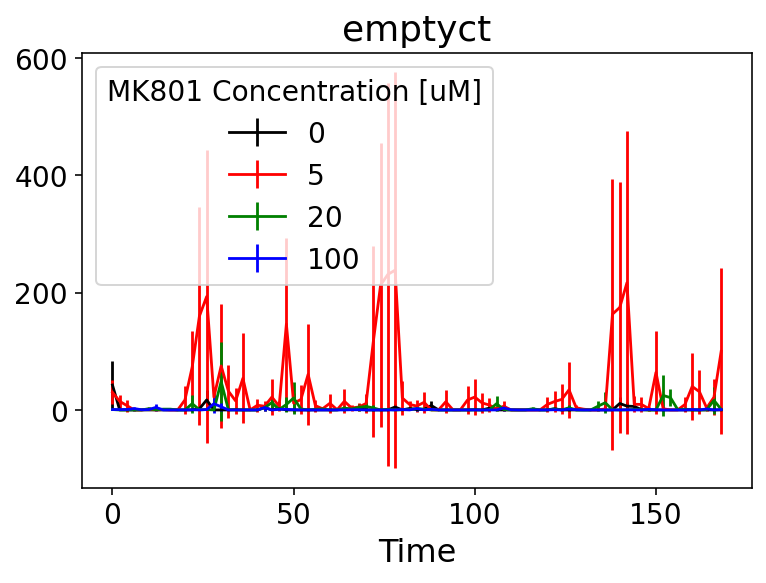

In [15]:
var = 'emptyct'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.emptyct_mean, yerr=vehicle.emptyct_std, color='k',label='0')
plt.errorbar(x, c5.emptyct_mean, yerr=c5.emptyct_std, color='r',label='5')
plt.errorbar(x, c20.emptyct_mean, yerr=c20.emptyct_std, color='g',label='20')
plt.errorbar(x, c100.emptyct_mean, yerr=c100.emptyct_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

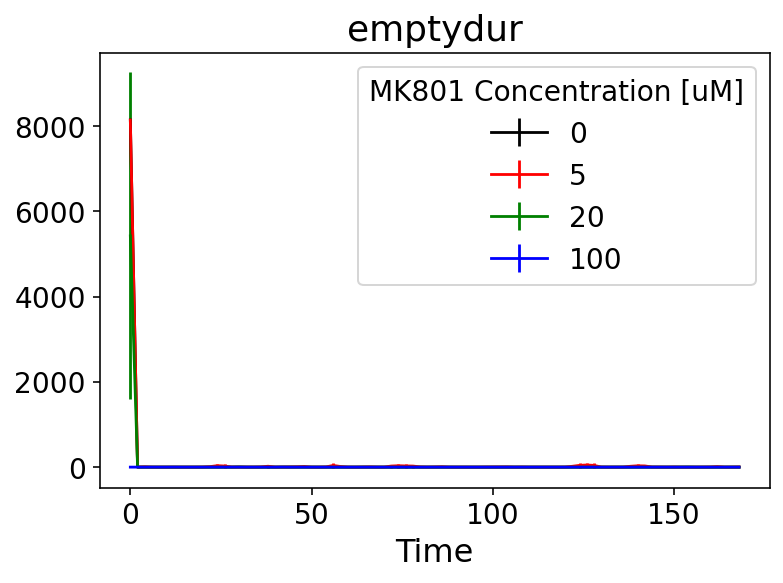

In [16]:
var = 'emptydur'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.emptydur_mean, yerr=vehicle.emptydur_std, color='k',label='0')
plt.errorbar(x, c5.emptydur_mean, yerr=c5.emptydur_std, color='r',label='5')
plt.errorbar(x, c20.emptydur_mean, yerr=c20.emptydur_std, color='g',label='20')
plt.errorbar(x, c100.emptydur_mean, yerr=c100.emptydur_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

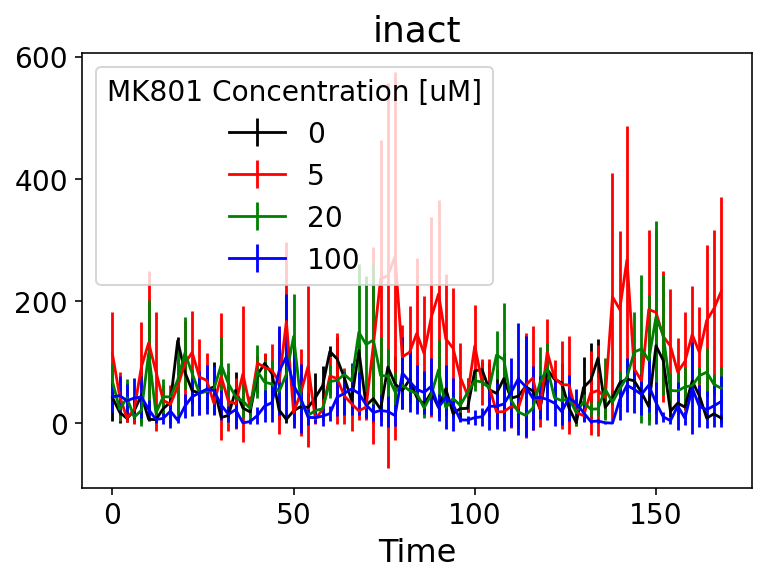

In [17]:
var = 'inact'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.inact_mean, yerr=vehicle.inact_std, color='k',label='0')
plt.errorbar(x, c5.inact_mean, yerr=c5.inact_std, color='r',label='5')
plt.errorbar(x, c20.inact_mean, yerr=c20.inact_std, color='g',label='20')
plt.errorbar(x, c100.inact_mean, yerr=c100.inact_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

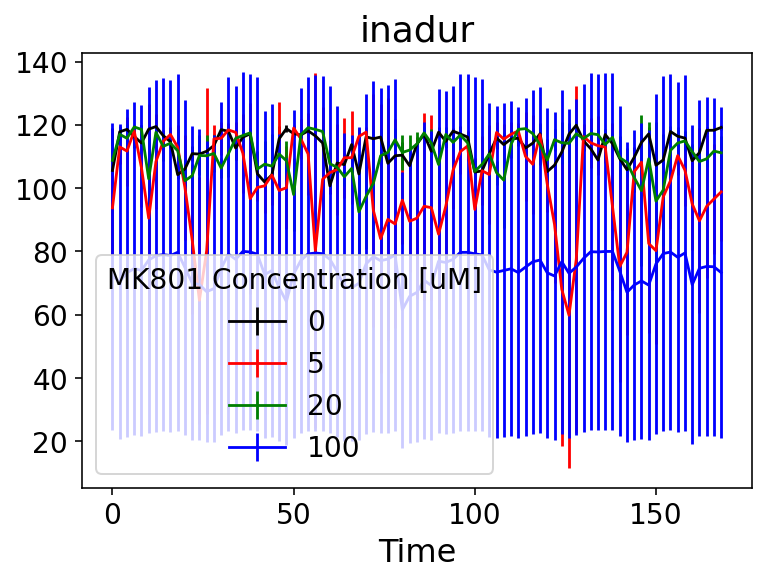

In [18]:
var = 'inadur'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.inadur_mean, yerr=vehicle.inadur_std, color='k',label='0')
plt.errorbar(x, c5.inadur_mean, yerr=c5.inadur_std, color='r',label='5')
plt.errorbar(x, c20.inadur_mean, yerr=c20.inadur_std, color='g',label='20')
plt.errorbar(x, c100.inadur_mean, yerr=c100.inadur_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

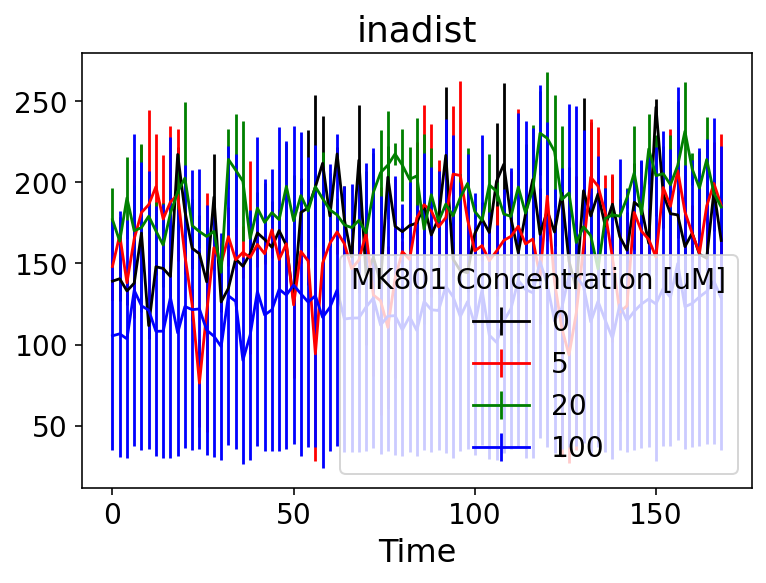

In [19]:
var = 'inadist'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.inadist_mean, yerr=vehicle.inadist_std, color='k',label='0')
plt.errorbar(x, c5.inadist_mean, yerr=c5.inadist_std, color='r',label='5')
plt.errorbar(x, c20.inadist_mean, yerr=c20.inadist_std, color='g',label='20')
plt.errorbar(x, c100.inadist_mean, yerr=c100.inadist_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

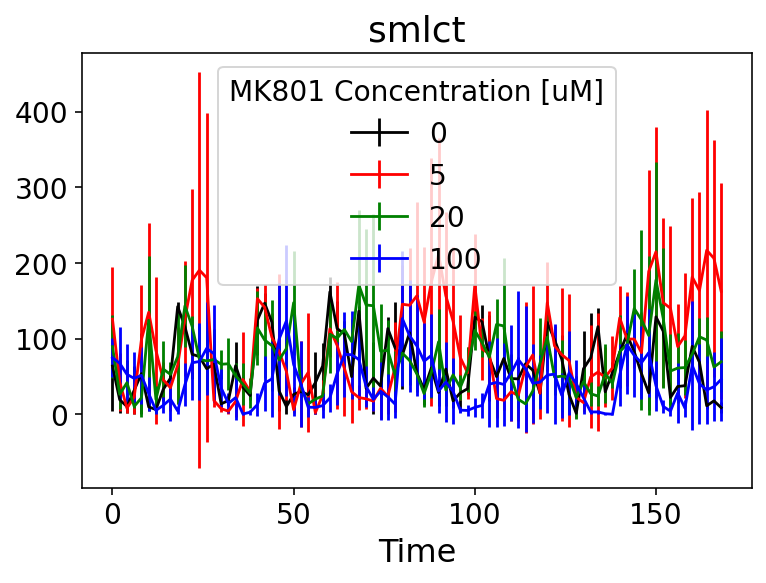

In [20]:
var = 'smlct'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.smlct_mean, yerr=vehicle.smlct_std, color='k',label='0')
plt.errorbar(x, c5.smlct_mean, yerr=c5.smlct_std, color='r',label='5')
plt.errorbar(x, c20.smlct_mean, yerr=c20.smlct_std, color='g',label='20')
plt.errorbar(x, c100.smlct_mean, yerr=c100.smlct_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

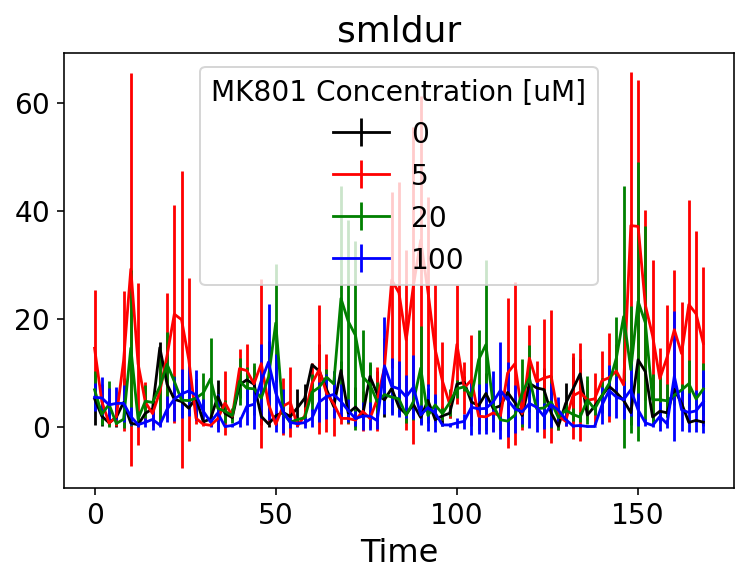

In [21]:
var = 'smldur'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.smldur_mean, yerr=vehicle.smldur_std, color='k',label='0')
plt.errorbar(x, c5.smldur_mean, yerr=c5.smldur_std, color='r',label='5')
plt.errorbar(x, c20.smldur_mean, yerr=c20.smldur_std, color='g',label='20')
plt.errorbar(x, c100.smldur_mean, yerr=c100.smldur_std, color = 'b', label='100')
plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

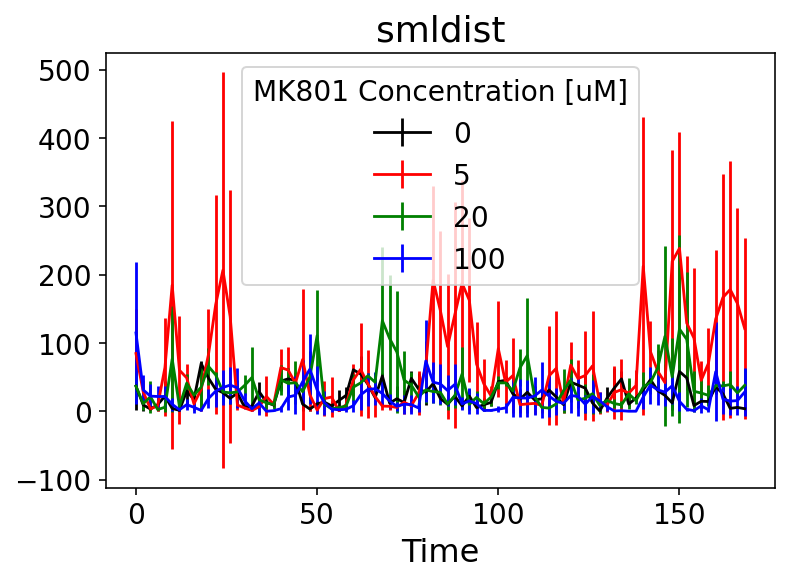

In [22]:
var = 'smldist'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.smldist_mean, yerr=vehicle.smldist_std, color='k',label='0')
plt.errorbar(x, c5.smldist_mean, yerr=c5.smldist_std, color='r',label='5')
plt.errorbar(x, c20.smldist_mean, yerr=c20.smldist_std, color='g',label='20')
plt.errorbar(x, c100.smldist_mean, yerr=c100.smldist_std, color = 'b', label='100')

# How do you know these are the dark periods?
# plt.axvspan(0, 10, color='grey', alpha=0.3, lw=0)
# plt.axvspan(20, 30, color='grey', alpha=0.3, lw=0)
# plt.axvspan(40, 50, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

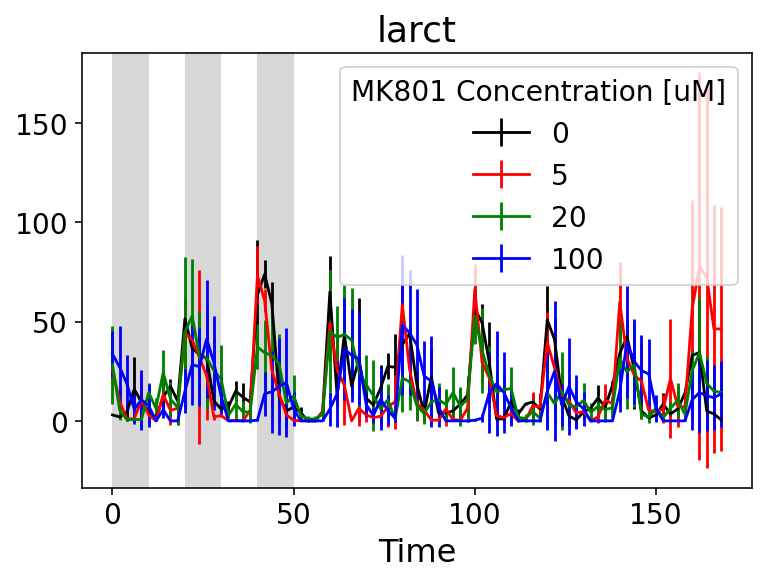

In [23]:
var = 'larct'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.larct_mean, yerr=vehicle.larct_std, color='k',label='0')
plt.errorbar(x, c5.larct_mean, yerr=c5.larct_std, color='r',label='5')
plt.errorbar(x, c20.larct_mean, yerr=c20.larct_std, color='g',label='20')
plt.errorbar(x, c100.larct_mean, yerr=c100.larct_std, color = 'b', label='100')

# How do you know these are the dark periods?
plt.axvspan(0, 10, color='grey', alpha=0.3, lw=0)
plt.axvspan(20, 30, color='grey', alpha=0.3, lw=0)
plt.axvspan(40, 50, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

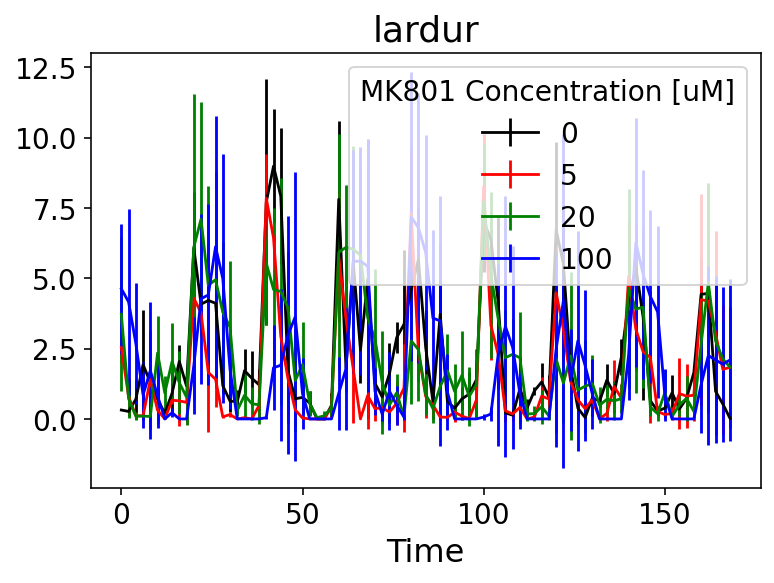

In [24]:
var = 'lardur'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.lardur_mean, yerr=vehicle.lardur_std, color='k',label='0')
plt.errorbar(x, c5.lardur_mean, yerr=c5.lardur_std, color='r',label='5')
plt.errorbar(x, c20.lardur_mean, yerr=c20.lardur_std, color='g',label='20')
plt.errorbar(x, c100.lardur_mean, yerr=c100.lardur_std, color = 'b', label='100')

# How do you know these are the dark periods?
# plt.axvspan(0, 10, color='grey', alpha=0.3, lw=0)
# plt.axvspan(20, 30, color='grey', alpha=0.3, lw=0)
# plt.axvspan(40, 50, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

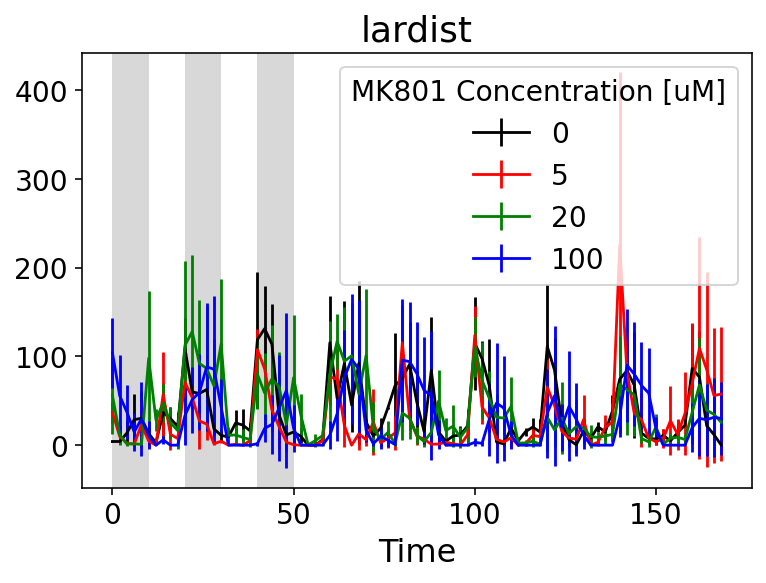

In [25]:
var = 'lardist'
plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.errorbar(x, vehicle.lardist_mean, yerr=vehicle.lardist_std, color='k',label='0')
plt.errorbar(x, c5.lardist_mean, yerr=c5.lardist_std, color='r',label='5')
plt.errorbar(x, c20.lardist_mean, yerr=c20.lardist_std, color='g',label='20')
plt.errorbar(x, c100.lardist_mean, yerr=c100.lardist_std, color = 'b', label='100')

# for i in range()
plt.axvspan(0, 10, color='grey', alpha=0.3, lw=0) # started on dark and then goes to light. I checked the file.
plt.axvspan(20, 30, color='grey', alpha=0.3, lw=0)
plt.axvspan(40, 50, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

### Data from every fish:
entct, emptyct, emptydur, inact, inadur, inadist, smlct, smldur, smldist, larct, lardur, lardist


## Note that one of the fish in vehicle died in the 

# Troubleshoot, probelm with datatypes

Is the problem because of inheritance?

Maybe, I cannot find how to solve it. So I just took another approach.

Try running the following 2 cells and you'll see the issue...

In [26]:
def mean_fish(v1=1, v2=2, v3=3, label="emptyct"):
    var1 = "fish"+str(v1)+"."+label
    var2 = "fish"+str(v2)+"."+label
    var3 = "fish"+str(v3)+"."+label
    print(type(var1))
    print(var1)
#     return np.mean([np.ndarray(var1), np.ndarray(var2), np.ndarray(var3)],0)
    return np.mean([var1, var2, var3],0)

In [27]:
try:
    np.mean([fish1.emptyct, fish2.emptyct, fish3.emptyct],0)

    mean_fish(1, 2, 3, "emptyct")

SyntaxError: unexpected EOF while parsing (2892921670.py, line 4)

In [ ]:
# For fish 1, the duration.
var = 'Total Duration when fish 1 was moving'
num = len(fish1.smldur)
x = [(i+1)/.6 for i in range(num)]
iterations = round(num/10)

plt.title(var)
plt.plot(x, fish1.lardur+fish1.smldur, color='k',label='0')

#  distance_mean

# Dark periods
for i in range(iterations-1):
    plt.axvspan(i*20, i*20+10, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time [s]")
plt.ylabel("Duration when fish 1 was moving [s]")
plt.legend(title="MK801 Concentration [uM]")
plt.show()

In [ ]:
# For fish 1, the movement.
var = 'Total Distance covered by fish 1'
num = len(fish1.larct)
x = [(i+1)/.6 for i in range(num)]
iterations = round(num/10)

plt.title(var)
# For errorbars, see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

plt.plot(x, fish1.lardist+fish1.smldist, color='k',label='0')

# Dark periods
for i in range(iterations-1):
    plt.axvspan(i*20, i*20+10, color='grey', alpha=0.3, lw=0)

plt.xlabel("Time [s]")
plt.ylabel("Distance [mm]")
plt.legend(title="MK801 Concentration [uM]")
plt.show()